# INFSCI0310 Computation in Information Science
# Department of Computer Science, SCUPI

# Assignment 3: Linear Regression
# Due on: Wednesday, December 11th, 23:59 pm

Welcome to assignment 3, where you need to build a linear regression model from scratch to predict house prices. <br>


# Data files for this assignment
In order to get hand on the assignment, you have to download the data files and allocate them into the correct directory as follows:

```
├── [your working directory]
   ├── house.csv
```

**Please make sure to use the correct path to these files when working on your own machine. Recall that the jupyter *.ipynb file (this assignment file) should be in your working directory.**

# 1. Theory Preparation

In order to build the linear regression model from scratch, you need to review/prepare the theories: <br>
1. The Math notations to use, together with their sizes/dimensionalities. <br>
2. The expression to compute the loss values, assume we are using MSE to evaluate the loss. <br>
3. The expression to compute the gradients of parameters, assume we are using gradient descent to optimize the model. <br>


### <font color='red'>Exercise 1 (20 marks) </font>
Now we state:
* $\boldsymbol{X}\in\mathbb{R}^{d\times n}$ as the feature set, $\boldsymbol{y}\in\mathbb{R}^{1\times n}$ as the ground truth house prices. <br>
* $\boldsymbol{w}\in\mathbb{R}^{d\times 1}$ as the weight vector, $b$ is the bias scalar <br>
* $L$ is the MSE loss value

As you might realize we have already helped you with the Math notations, please complete the left two tasks, and justify your answer by presenting the computational processes or any proofs related. The left two tasks are: <br>
1. The expression to compute the loss values, assume we are using MSE to evaluate the loss. <br>
2. The expression to compute the gradients of parameters, assume we are using gradient descent to optimize the model. 

**Note**: <font color='red'>Exercise 1 is the foundation of this assignment, fatal mistakes will lead to a 20% deduction of your total mark for the whole assignment.</font> <br>
**Note**: your expressions should only include the notations we gave, in other words, you need to complete these tasks using a very compact vector/matrix form. Meaning that there should not exist notations such as $\boldsymbol{x}_{i}$ or $y_{i}$ <br>
**Note**: we **only accept** jupyter Markdown answers, answers come from Word, PDF, or photos taken from an actual A4 paper, are **NOT valid**. <br>
**Note**: wrong format of Math notations (italic, bold) will **NOT** be counted as fatal mistakes, however, you need to assue the correctness of any computational flows in your answer. <br>
**Hint**: for the bias $b$, you can use $b\cdot\boldsymbol{1}$ to fit the vector/matrix form, where $\boldsymbol{1}\in\mathbb{R}^{1\times n}$.

#### 1. MSE
$$
L = \frac{1}{n} \|\boldsymbol{y} - (\boldsymbol{w}^\top\boldsymbol{X} + b\cdot\boldsymbol{1})\|^2
$$

#### 2. Gradients of Parameters
- Gradient with respect to $\boldsymbol{w}$:
  $$
  \frac{\partial L}{\partial \boldsymbol{w}} = -\frac{2}{n}\boldsymbol{X}(\boldsymbol{y} - (\boldsymbol{w}^\top\boldsymbol{X} + b\cdot\boldsymbol{1}))^\top
  $$

- Gradient with respect to $b$:
  $$
  \frac{\partial L}{\partial b} = -\frac{2}{n}\boldsymbol{1}(\boldsymbol{y} - (\boldsymbol{w}^\top\boldsymbol{X} + b\cdot\boldsymbol{1}))^\top
  $$

#### Proof<br>
1: MSE

In matrix notation, the MSE can be written as follows:

$$ L = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 $$

Where:
- $\hat{y}_i$ is the predicted value for the $i$-th sample,
- \(y_i\) is the actual value for the $i$-th sample.

Then, let's define the predictions $\hat{\boldsymbol{y}}$ as a linear combination of the input features and the model parameters:

$$ \hat{\boldsymbol{y}} = \boldsymbol{X}^T \boldsymbol{w} + b \cdot \boldsymbol{1} $$

Here, $\boldsymbol{1} \in \mathbb{R}^{1\times n}$ is a row vector of ones, which allows us to add the bias term $b$ to each element of the prediction vector $\hat{\boldsymbol{y}}$.

Now, the MSE can be rewritten using matrix notation:

$$ L = \frac{1}{n} \| \hat{\boldsymbol{y}} - \boldsymbol{y} \|_F^2 $$

Where $\| \cdot \|_F$ denotes the Frobenius norm, which is the square root of the sum of the squares of all elements in a matrix. Since $\hat{\boldsymbol{y}}$ and $\boldsymbol{y}$ are vectors, the Frobenius norm reduces to the Euclidean norm of the difference vector.

Expanding the Frobenius norm, we get:

$$ L = \frac{1}{n} (\hat{\boldsymbol{y}} - \boldsymbol{y})^T (\hat{\boldsymbol{y}} - \boldsymbol{y}) $$

Substituting $\hat{\boldsymbol{y}} = \boldsymbol{X}^T \boldsymbol{w} + b \cdot \boldsymbol{1}$, we obtain:

$$ L = \frac{1}{n} ((\boldsymbol{X}^T \boldsymbol{w} + b \cdot \boldsymbol{1}) - \boldsymbol{y})^T ((\boldsymbol{X}^T \boldsymbol{w} + b \cdot \boldsymbol{1}) - \boldsymbol{y}) $$
$$
L = \frac{1}{n} \|\boldsymbol{y} - (\boldsymbol{w}^\top\boldsymbol{X} + b\cdot\boldsymbol{1})\|^2
$$


#### Step 2: Gradients of Parameters


##### Gradient with Respect to $\boldsymbol{w}$:

Using the chain rule, the gradient of $L$ with respect to $\boldsymbol{w}$ can be derived as follows:

$$
  \frac{\partial L}{\partial \boldsymbol{w}} = -\frac{2}{n}\boldsymbol{X}(\boldsymbol{y} - (\boldsymbol{w}^\top\boldsymbol{X} + b\cdot\boldsymbol{1}))^\top
$$

##### Gradient with Respect to $b$:

Similarly, the gradient of $L$ with respect to $b$ can be derived as follows:

$$
  \frac{\partial L}{\partial b} = -\frac{2}{n}\boldsymbol{1}(\boldsymbol{y} - (\boldsymbol{w}^\top\boldsymbol{X} + b\cdot\boldsymbol{1}))^\top
$$

# 2. Data and Model

After knowing these computations from a foudamental level, we can code the linear regression task now, but before that, let's load and view the data:

In [3]:
import pandas as pd
house = pd.read_csv('./house.csv', header=0)
print(house)

      Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... 

This dataset was collected over several years for the city of Ames, Iowa. As you can see, there are a lot of features to look, to make this assignment simpler, we focus on a subset of this dataset, *house_filtered*:

In [2]:
house_filtered = house[(house['Bldg Type']=='1Fam') & (house['Sale Condition']=='Normal')]
house_filtered = house_filtered[['SalePrice','1st Flr SF', '2nd Flr SF', 'Total Bsmt SF', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Lot Area', 'Year Built', 'Yr Sold']]
print(house_filtered)

NameError: name 'house' is not defined

## <font color='red'>Exercise 2 (15 marks) </font>
In *house_filtered*, the data column *SalePrice* denotes the house prices that require prediction, other data columns are features. <br>
In this exercise, you need to take a deeper look into the data, answer the following questions, code analysis and demonstrations to justify your answer:

1. Do you think the house prices in *house_filtered* are suitably distributed to construct the regression model?
2. Any features that you want to remove from the dataset? If yes, please point out the column names of these features.
3. Any pre-processing you would like to apply on *house_filtered*? If yes, please state the reason and proceed your pre-processing for the next step of usage.

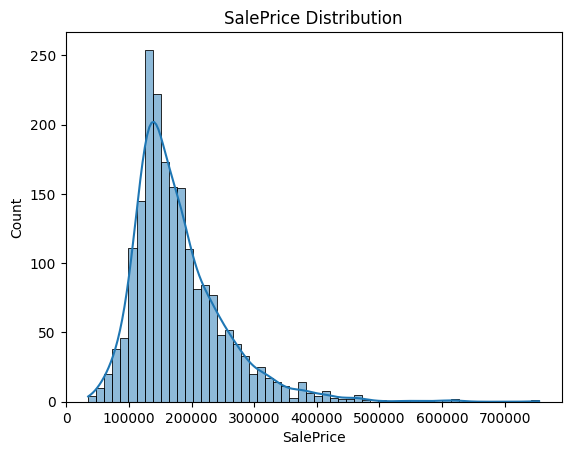

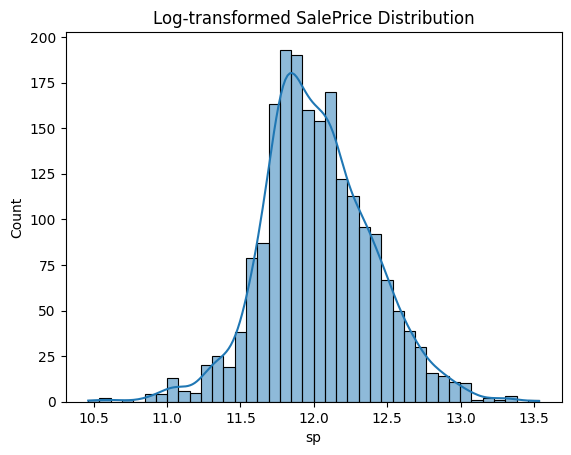

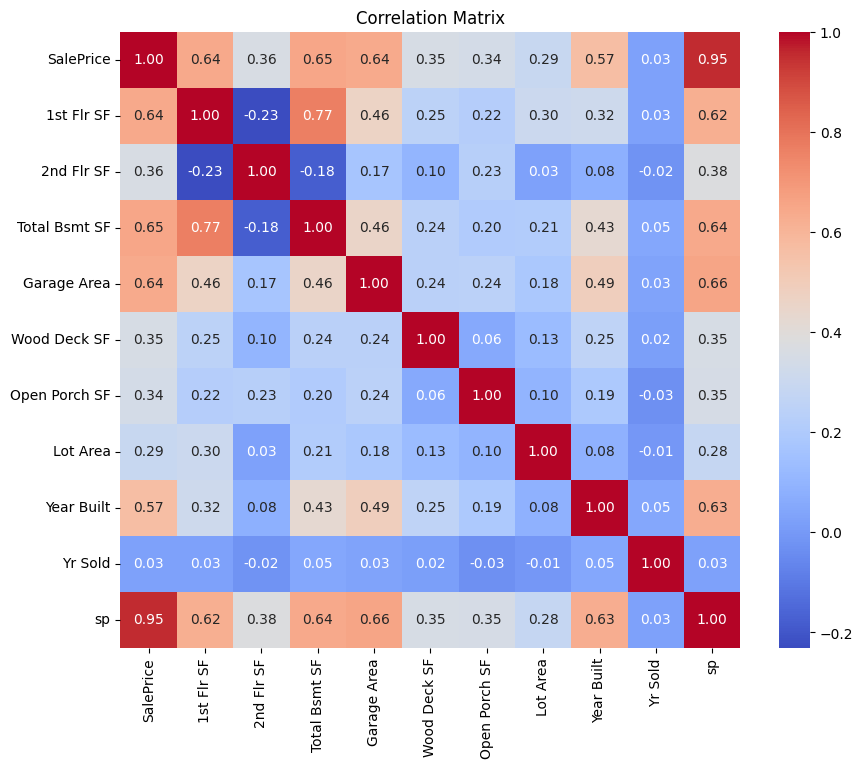

Feature correlation with SalePrice:
 SalePrice        1.000000
sp               0.954736
Total Bsmt SF    0.652979
1st Flr SF       0.642466
Garage Area      0.638594
Year Built       0.565165
2nd Flr SF       0.357522
Wood Deck SF     0.352699
Open Porch SF    0.336909
Lot Area         0.290823
Yr Sold          0.025949
Name: SalePrice, dtype: float64


Missing values:
 SalePrice        0
1st Flr SF       0
2nd Flr SF       0
Total Bsmt SF    0
Garage Area      0
Wood Deck SF     0
Open Porch SF    0
Lot Area         0
Year Built       0
Yr Sold          0
sp               0
dtype: int64
   1st Flr SF  Total Bsmt SF  Garage Area  Year Built        sp  log_SalePrice
0    1.412652       0.121285     0.296678   -0.252168  0.677689      12.278398
1   -0.688465      -0.372096     1.295860   -0.218594 -1.231087      11.561725
2    0.508618       0.741750    -0.771754   -0.319314  0.083375      12.055256
3    2.667793       2.687865     0.266999    0.016418  1.014687      12.404928
4   -0.59

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('house_filtered.csv')

# Q1
# Check the distribution of SalePrice
sns.histplot(df['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.show()
# Log-transform SalePrice
df['sp'] = np.log1p(df['SalePrice'])
sns.histplot(df['sp'], kde=True)
plt.title('Log-transformed SalePrice Distribution')
plt.show()
# Calculate the correlation matrix
corr_matrix = df.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Q2
# Select features with high correlation with SalePrice
corr_threshold = 0.5
# View the correlation of features with SalePrice
saleprice_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
print("Feature correlation with SalePrice:\n", saleprice_corr)
print("\n")

# Q3
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

drop = ['2nd Flr SF', 'Wood Deck SF', 'Open Porch SF', 'Lot Area', 'Yr Sold']
df_cleaned = df.drop(columns=drop)
df_cleaned['log_SalePrice'] = np.log1p(df_cleaned['SalePrice'])
df_cleaned.drop(columns=['SalePrice'], inplace=True)

scale = ['sp', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'Year Built']
scaler = StandardScaler()
df_cleaned[scale] = scaler.fit_transform(df_cleaned[scale])
print(df_cleaned.head())

df_cleaned.to_excel('house_cleaned.xlsx', index=False)

1. To determine whether the distribution of SalePrice is suitable for building a linear regression model, we need to check its distribution. Linear regression assumes that the target variable SalePrice is normally distributed. If SalePrice is heavily skewed, we can consider applying a log transformation to make it more normally distributed.<br>
The histogram shows that the original SalePrice distribution is **right-skewed**, which is **not ideal** for linear regression.<br>
We can apply the **log transformation** to make the distribution closer to a normal distribution. Therefore, using the log-transformed SalePrice is more suitable for building a linear regression model.<br>
<br>
2. To find whether any features should be removed, we can examine the correlation between each feature and SalePrice. Features with very low correlation can be considered for removal. We will calculate the correlation matrix and visualize it using a heatmap.<br>
The heatmap provides a visual representation of the correlations between all features.<br>
Based on the correlation values, we can remove features that have low correlation under 0.5: **2nd Flr SF, Wood Deck SF, Open Porch SF, Lot Area, Yr Sold**.<br>
<br>
3. Yes.<br>
First, we check for missing values in the dataset and decide how to handle them. We can find that there is no missing value in this dataset.<br>
Second, we drop the features that we have decided to remove previously.<br>
Third, we apply log transformation to SalePrice because the original SalePrice distribution is right-skewed.<br>
Then, to ensure that different features have similar numerical ranges, we standardize the numerical features. This ensures that all features are on a similar scale, improving the convergence speed and stability of the model.<br>

## <font color='red'>Exercise 3 (65 marks) </font>
After a preview of the data, you should move to this stage, i.e., implement your model and optimize its parameters to learn how to perform the regression task, i.e., predict house prices. <br>
In this exercise, you need to complete the following tasks: <br>

1. Split your data into features $\boldsymbol{X}\in\mathbb{R}^{d\times n}$, and targets (ground truth house prices) $\boldsymbol{y}\in\mathbb{R}^{1\times n}$. Initialize your regression model, i.e., the weight vector $\boldsymbol{w}\in\mathbb{R}^{d\times 1}$ and the bias value $b$ **(10 marks)**.
2. Build the computations you have discovered in **Exercise 1**, these computations will lead you to the MSE loss values and the gradients **(25 marks)**.
3. Apply gradient descents to train your regression model, iteratively update the parameters, i.e., the weight vector $\boldsymbol{w}\in\mathbb{R}^{d\times 1}$ and the bias value $b$. To simplify things, use all the data in each iteration of gradient descent **(10 marks)**.
4. Decide when to stop the optimization process (the gradient descent) and answer why do you want to stop the training here **(5 marks)**.
5. In the end, please summarize the regression performance of your regression model. How would you comment on such model performance? Use text to describe where you can improve the performance of the model and the rationality behind such improvements **(15 marks)**.

**Note**: <font color='red'>Please DO NOT use any Python libraries embedded with linear regression or gradient descent, you need to stick with basic functionalities of Numpy to code all computational processes, failed to comply with this will lead to an immediate 0 marks for Exercise 3.</font> <br>
**Note**: for simplicity, here you should focus only on the training stage and use all the data for training purposes. <br>
**Note**: you may want to explain the regression performance using the unit of "house prices".

1. In the code. <br><br>
2. In the code. <br><br>
3. In the code. <br><br>
4. When the loss is close enough to 0, **smaller than the tolerance**, the algorithm will stop. By the principle of **Gradient Descent**, we can know that when the gradient is close enough to 0, it means that we reach the minimum loss.<br><br>
5. Performance is **not good** because in our evaulation, MSE is very large (1739374328.25) and R^2 (0.68) is small. Therefore, the model needs to be improved. <br>
**How to improve**: <br>
a. Feature Engineering: Add more features related to house prices or use feature selection techniques (e.g., RFE, Lasso) to identify the most relevant features.<br>
b. Feature Scaling: Ensure all features are properly standardized or normalized to facilitate better model convergence.<br>
c. Non-linear Relationships: Introduce interaction terms or polynomial features to capture more complex relationships between features and the target variable.<br>
d. Regularization: Apply regularization techniques like Ridge or Lasso regression to prevent overfitting.<br>
e. Model Selection: If linear regression performs poorly, consider more complex models such as Random Forest, XGBoost, or neural networks.<br>
Train-Test Split: Use a separate test set to evaluate model performance and avoid overfitting by splitting the data into training and testing sets.

Iteration 0, Loss: 163.285612
Iteration 100, Loss: 3.128177
Iteration 200, Loss: 0.162992
Iteration 300, Loss: 0.071456
Iteration 400, Loss: 0.056244
Iteration 500, Loss: 0.050701
Iteration 600, Loss: 0.048471
Iteration 700, Loss: 0.047557
Iteration 800, Loss: 0.047181
Converged at iteration 897

First 5 Predicted Original Prices (y_pred_original):
[[194958.79806425]
 [171056.99728708]
 [161064.20326062]
 [262136.45981026]
 [176216.44456111]]

First 5 Original Prices (y_original):
[[215000.]
 [105000.]
 [172000.]
 [244000.]
 [189900.]]
MSE: 1739374328.25
RMSE: 41705.81
R^2: 0.68


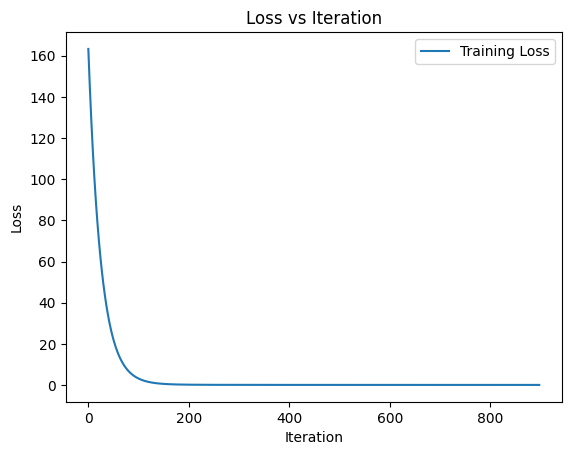

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('house_filtered.csv')
# preprocessing
drop = ['2nd Flr SF', 'Wood Deck SF', 'Open Porch SF', 'Lot Area', 'Yr Sold']
df_cleaned = df.drop(columns=drop)
df_cleaned['log_SalePrice'] = np.log1p(df_cleaned['SalePrice'])
df_cleaned.drop(columns=['SalePrice'], inplace=True)
scale = ['sp', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'Year Built']
scaler = StandardScaler()
df_cleaned[scale] = scaler.fit_transform(df_cleaned[scale])

# Q1
# features initialization
X = df_cleaned[['Total Bsmt SF', '1st Flr SF', 'Garage Area', 'Year Built']].values
# target initialization
y = df_cleaned['log_SalePrice'].values.reshape(-1, 1)
# bias initialization
X = np.hstack([np.ones((X.shape[0], 1)), X])  
# weights initialization
n_features = X.shape[1]  
w = np.random.randn(n_features, 1)  

# Q2
def get_MSE_loss(X, y, w):
    n = len(y)
    y_pred = X @ w  
    loss = (1 / n) * np.sum((y_pred - y) ** 2)
    return loss

def get_gradients(X, y, w):
    n = len(y)
    y_pred = X @ w  
    gradients = (2 / n) * X.T @ (y_pred - y)
    return gradients

# Q3
def regression_model(X, y, w, rate=0.01, n=1000, tol=1e-6):
    losses = []  
    for i in range(n):
        # compute loss and gradients
        loss = get_MSE_loss(X, y, w)
        gradients = get_gradients(X, y, w)
        # update weights
        w -= rate * gradients
        # record loss
        losses.append(loss)
        # print loss every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss:.6f}")
        # check convergence
        if i > 0 and abs(losses[-1] - losses[-2]) < tol:
            print(f"Converged at iteration {i}\n")
            break
    return w, losses

w, losses = regression_model(X, y, w, rate=0.01, n=1000, tol=1e-6)

# Q5
y_pred = X @ w
# inverse log transformation using np.expm1()
y_pred_original = np.expm1(y_pred) 
y_original = np.expm1(y)  
# performance evaluation
mse = mean_squared_error(y_original, y_pred_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_original, y_pred_original)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

# the loss curve
plt.plot(losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iteration')
plt.legend()
plt.show()


### <font color='blue'>Submission</font>

You only need to submit the jupyter file in **ipynb** format, rename it as: A3_YOURID_YOURNAME (For instance: A3_2023141520000_Sofia) <br>